# Credit Card Fraud Detection

This data science project focuses on analyzing financial transactions to detect fraud using machine learning techniques. Models like logistic regression and random forest classifier are employed to classify transactions as normal or fraudulent. The project involves thorough data cleaning, exploration, and visualization to better understand the characteristics that distinguish fraudulent transactions. The main goal is to develop an accurate model that can identify frauds with high precision and recall rates, thereby providing an effective tool for fraud detection in financial transactions.

Bibliography:

priyang. "Credit Card Fraud Detect Under & Over Sampling". https://www.kaggle.com/code/priyang/credit-card-fraud-detect-under-over-sampling/notebook


In [2]:
import numpy as np # linear algebra
import seaborn as sns # data visualization
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import warnings    # Manage warning messages
warnings.filterwarnings('ignore')

In [3]:
# Declare dataset
data = pd.read_csv('/Users/rich/Documentos/Ciencia_Datos/Projects/Project_1/creditcard.csv')

## Dataset Check

In [4]:
# Show Columns
pd.options.display.max_columns = None

In [5]:
# Display the beginning of the data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Display the end of the data
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
# Shape of dataset
print('Number of rows', data.shape[0])
print('Number of Columns', data.shape[1])

Number of rows 284807
Number of Columns 31


In [8]:
# Information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# Checking for null values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Scaling Dataset

In [10]:
# Remove the mean and scale to unit variance
from sklearn.preprocessing import StandardScaler

In [11]:
sc = StandardScaler() 
# Ensure that the data has the same scale and distribution.
# Improvement of the machine learning model
data['Amount'] = sc.fit_transform(pd.DataFrame(data['Amount']))

In [12]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


## Cleaning Dataset

In [13]:
# Remove the 'Time' column
data = data.drop(['Time'], axis=1)

In [14]:
data.shape

(284807, 30)

In [15]:
# Check for duplicate rows
data.duplicated().any()

True

In [16]:
# Remove duplicate rows
data = data.drop_duplicates()

In [17]:
data.shape

(275663, 30)

In [18]:
# Count the occurrences of each unique value in the 'Class' column
data['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

## Training

<Axes: ylabel='count'>

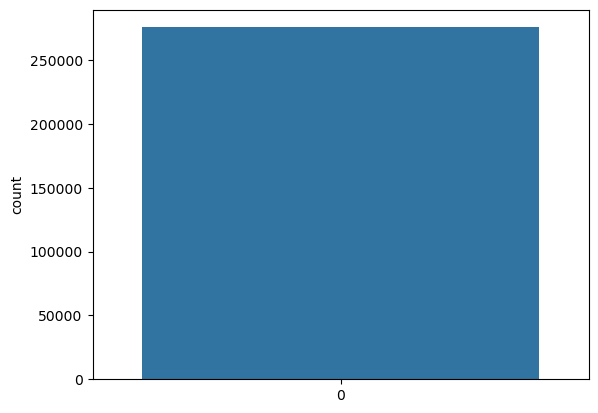

In [19]:
# Visualize the distribution of the 'Class' column
sns.countplot(data['Class'])

In [20]:
X = data.drop('Class', axis=1) # Remove the 'Class' column from the dataset data
y =data['Class'] # Consider the 'Class column'

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
# test_size=0.20 reserves 20% for the test set, while 80% is allocated to 
# the training set. random_state=42 is a numerical value
#  used as a seed for the random number generator.

In [22]:
# Values assigned as 0 are normal, and one represents fraud
normal = data[data['Class']==0]
fraud = data[data['Class']==1]

In [23]:
normal.shape

(275190, 30)

In [24]:
fraud.shape

(473, 30)

In [25]:
# Assigns a random sample of 473 from the normal dataset
normal_sample=normal.sample(n=473)

In [26]:
normal_sample.shape

(473, 30)

In [27]:
# Combine two datasets, that is, merge specific samples 
# from different groups for a data analysis
new_data = pd.concat([normal_sample,fraud],ignore_index=True)

In [30]:
# Info new_data
new_data['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [28]:
X = new_data.drop('Class', axis=1)
y = new_data['Class']

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

### Logistic Regression

Logistic regression is a method used to model the probability that a categorical dependent variable has certain values. Despite its name "regression," it is commonly used for binary classification problems. In this context, it is applied to predict whether a transaction is fraudulent (1) or normal (0) based on features such as transaction amount. In the provided code, preparations like selecting random samples of normal transactions and concatenating them with fraudulent transactions to form a balanced dataset can be made. This dataset can then be split into training and testing sets to train a logistic regression model that can classify new transactions based on the probability of being fraudulent.

In [30]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression() 
log.fit(X_train,y_train) # Train the logistic regression model using the training data

LogisticRegression()

In [31]:
# Calculated predictions based on the features
# provided in X_test
y_pred1 = log.predict(X_test)

In [32]:
# It is an evaluation metric for classification problems
from sklearn.metrics import accuracy_score

In [33]:
# Calculates the accuracy of predictions made by a 
# classifications model.
accuracy_score(y_test,y_pred1)

0.9526315789473684

In [34]:
# precision score: Calculates the precision of the model, the ratio of correct positive predictions to false positive
# recall score: Measures the model's sensitivity to predict positive samples
# F1-score: Provides a balance between precision and recall
from sklearn.metrics import precision_score,recall_score,f1_score, classification_report

In [59]:
precision = precision_score(y_test,y_pred1)
recall = recall_score(y_test,y_pred1)
f1 = f1_score(y_test,y_pred1)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        88
           1       0.99      0.92      0.95       102

    accuracy                           0.95       190
   macro avg       0.95      0.96      0.95       190
weighted avg       0.96      0.95      0.95       190



In [41]:
# Organize and combine the actual values and predictions into a single DataFrame
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1})

fraudulent = predictions[predictions['Predicted'] == 1]
normal = predictions[predictions['Predicted'] == 0]

In [44]:
# Display some fraudulent transactions.
print("Fraudulent Transactions:")
print(fraudulent.head())

Fraudulent Transactions:
     Actual  Predicted
820       1          1
523       1          1
941       1          1
796       1          1
477       1          1


In [45]:
# Display some normal transactions.
print("Normal Transactions:")
print(normal.head())

Normal Transactions:
     Actual  Predicted
327       0          0
30        0          0
404       0          0
76        0          0
59        0          0


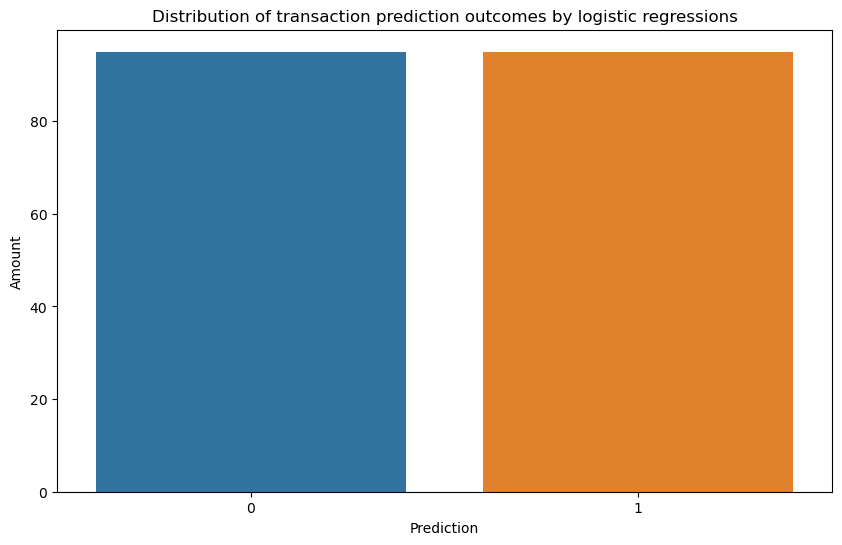

In [46]:
# Distribution of predictions made by logistic regression
plt.figure(figsize=(10, 6))
sns.countplot(data=predictions, x='Predicted')
plt.title('Distribution of transaction prediction outcomes by logistic regressions')
plt.xlabel('Prediction')
plt.ylabel('Amount')
plt.show()

In [47]:
# Visualization of fraudulent and normal transactions
# Adding original columns for further analysis
test_data = X_test.copy()
test_data['Actual'] = y_test
test_data['Predicted'] = y_pred1

# Display some fraudulent and normal transactions in more detail
fraudulent_detailed = test_data[test_data['Predicted'] == 1]
normal_detailed = test_data[test_data['Predicted'] == 0]

In [48]:
print("Detailed fraudulent transactions:")
print(fraudulent_detailed.head())

Detailed fraudulent transactions:
            V1        V2         V3         V4        V5        V6         V7  \
820   1.889618  1.073099  -1.678018   4.173268  1.015516 -0.009389  -0.079706   
523 -15.271362  8.326581 -22.338591  11.885313 -8.721334 -2.324307 -16.196419   
941  -1.927883  1.125653  -4.518331   1.749293 -1.566487 -2.010494  -0.882850   
796  -1.456876  3.740306  -7.404518   7.440964 -1.549878 -1.661697  -5.757213   
477   1.234235  3.019740  -4.304597   4.732795  3.624201 -1.357746   1.713445   

           V8        V9        V10       V11        V12       V13        V14  \
820  0.064071 -0.714517   0.042228 -0.408403  -0.929370  0.058686  -3.512845   
523  0.512882 -6.333685 -13.175198  9.939820 -14.225456  0.716034 -14.004776   
941  0.697211 -2.064945  -5.587794  2.115795  -5.417424 -1.235123  -6.665177   
796  1.615011 -2.194881  -6.807135  6.825793 -10.399749  1.836449 -11.872845   
477 -0.496358 -1.282858  -2.447469  2.101344  -4.609628  1.464378  -6.079337   

In [49]:
print("Detailed normal transactions:")
print(normal_detailed.head())

Detailed normal transactions:
           V1        V2        V3        V4        V5        V6        V7  \
327 -0.498212  1.194626  0.489327 -0.510890  0.905514  0.299801  0.545648   
30  -1.284036  1.611890  2.333462  3.886285 -0.415366  2.462808 -0.368639   
404 -0.638528  0.064402  1.245813 -0.983015  2.673065 -2.509824 -2.065747   
76  -0.601800  1.165868  1.243310 -0.198602  0.082964 -0.649808  0.635009   
59  -1.003190 -0.940193  2.313455 -0.544606 -2.253453  1.941685  1.696626   

           V8        V9       V10       V11       V12       V13       V14  \
327  0.194292 -0.346495 -0.028883 -0.031577  0.062643  0.359219 -0.411208   
30   0.742133 -0.814311  2.436457 -0.155127 -0.854153 -0.495418 -0.346186   
404 -0.905805  0.304228 -0.542724 -0.942403  0.254419 -0.971853  0.569702   
76   0.010037 -0.081902  0.015883 -0.921475 -0.512914 -0.462933  0.157587   
59  -0.689180 -0.518230  0.784091  1.480073 -0.134205  0.237198 -1.537309   

          V15       V16       V17       V18 

### Decision Tree Classifier

A decision tree classifier is a machine learning model used to make decisions based on a series of logical rules. In this context, it's a technique that uses tree-like structures to predict the class to which new data belongs based on available features.



In [50]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [51]:
y_pred2 = dt.predict(X_test)

In [52]:
accuracy_score(y_test,y_pred2)

0.9105263157894737

In [60]:
precision2 = precision_score(y_test,y_pred2)
recall2 = recall_score(y_test,y_pred2)
f12 = f1_score(y_test,y_pred2)
print(classification_report(y_test, y_pred2))

precision2 = precision_score(y_test,y_pred2)

              precision    recall  f1-score   support

           0       0.89      0.92      0.91        88
           1       0.93      0.90      0.92       102

    accuracy                           0.91       190
   macro avg       0.91      0.91      0.91       190
weighted avg       0.91      0.91      0.91       190



In [61]:
# Organize and combine the actual values and predictions into a single DataFrame
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})

fraudulent = predictions[predictions['Predicted'] == 1]
normal = predictions[predictions['Predicted'] == 0]

In [62]:
# Display some fraudulent transactions.
print("Fraudulent Transactions:")
print(fraudulent.head())

Fraudulent Transactions:
     Actual  Predicted
820       1          1
523       1          1
941       1          1
796       1          1
477       1          1


In [63]:
# Display some normal transactions.
print("Normal Transactions:")
print(normal.head())

Normal Transactions:
     Actual  Predicted
327       0          0
30        0          0
404       0          0
76        0          0
59        0          0


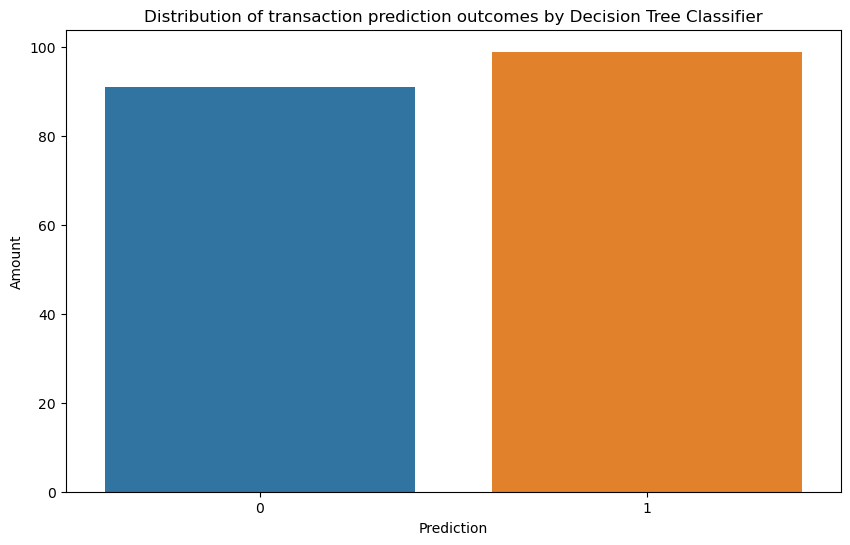

In [64]:
# Distribution of predictions made by Decision Tree Classifier
plt.figure(figsize=(10, 6))
sns.countplot(data=predictions, x='Predicted')
plt.title('Distribution of transaction prediction outcomes by Decision Tree Classifier')
plt.xlabel('Prediction')
plt.ylabel('Amount')
plt.show()

In [65]:
# Visualization of fraudulent and normal transactions
# Adding original columns for further analysis
test_data = X_test.copy()
test_data['Actual'] = y_test
test_data['Predicted'] = y_pred2

# Display some fraudulent and normal transactions in more detail
fraudulent_detailed = test_data[test_data['Predicted'] == 1]
normal_detailed = test_data[test_data['Predicted'] == 0]

In [66]:
print("Detailed fraudulent transactions:")
print(fraudulent_detailed.head())

Detailed fraudulent transactions:
            V1        V2         V3         V4        V5        V6         V7  \
820   1.889618  1.073099  -1.678018   4.173268  1.015516 -0.009389  -0.079706   
523 -15.271362  8.326581 -22.338591  11.885313 -8.721334 -2.324307 -16.196419   
941  -1.927883  1.125653  -4.518331   1.749293 -1.566487 -2.010494  -0.882850   
796  -1.456876  3.740306  -7.404518   7.440964 -1.549878 -1.661697  -5.757213   
477   1.234235  3.019740  -4.304597   4.732795  3.624201 -1.357746   1.713445   

           V8        V9        V10       V11        V12       V13        V14  \
820  0.064071 -0.714517   0.042228 -0.408403  -0.929370  0.058686  -3.512845   
523  0.512882 -6.333685 -13.175198  9.939820 -14.225456  0.716034 -14.004776   
941  0.697211 -2.064945  -5.587794  2.115795  -5.417424 -1.235123  -6.665177   
796  1.615011 -2.194881  -6.807135  6.825793 -10.399749  1.836449 -11.872845   
477 -0.496358 -1.282858  -2.447469  2.101344  -4.609628  1.464378  -6.079337   

In [67]:
print("Detailed normal transactions:")
print(normal_detailed.head())

Detailed normal transactions:
           V1        V2        V3        V4        V5        V6        V7  \
327 -0.498212  1.194626  0.489327 -0.510890  0.905514  0.299801  0.545648   
30  -1.284036  1.611890  2.333462  3.886285 -0.415366  2.462808 -0.368639   
404 -0.638528  0.064402  1.245813 -0.983015  2.673065 -2.509824 -2.065747   
76  -0.601800  1.165868  1.243310 -0.198602  0.082964 -0.649808  0.635009   
59  -1.003190 -0.940193  2.313455 -0.544606 -2.253453  1.941685  1.696626   

           V8        V9       V10       V11       V12       V13       V14  \
327  0.194292 -0.346495 -0.028883 -0.031577  0.062643  0.359219 -0.411208   
30   0.742133 -0.814311  2.436457 -0.155127 -0.854153 -0.495418 -0.346186   
404 -0.905805  0.304228 -0.542724 -0.942403  0.254419 -0.971853  0.569702   
76   0.010037 -0.081902  0.015883 -0.921475 -0.512914 -0.462933  0.157587   
59  -0.689180 -0.518230  0.784091  1.480073 -0.134205  0.237198 -1.537309   

          V15       V16       V17       V18 

### Random Forest Classifier

Random Forest Classifier is a machine learning model that uses multiple decision trees to make predictions. In this context, it's a technique that combines several decision trees to improve accuracy and mitigate overfitting.





In [69]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [70]:
y_pred3 = rf.predict(X_test)

In [71]:
accuracy_score(y_test,y_pred3)

0.9526315789473684

In [72]:
precision3 = precision_score(y_test,y_pred3)
recall3 = recall_score(y_test,y_pred3)
f13 = f1_score(y_test,y_pred3)
print(classification_report(y_test, y_pred3))

precision3 = precision_score(y_test,y_pred3)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        88
           1       1.00      0.91      0.95       102

    accuracy                           0.95       190
   macro avg       0.95      0.96      0.95       190
weighted avg       0.96      0.95      0.95       190



In [73]:
# Organize and combine the actual values and predictions into a single DataFrame
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred3})

fraudulent = predictions[predictions['Predicted'] == 1]
normal = predictions[predictions['Predicted'] == 0]

In [74]:
# Display some fraudulent transactions.
print("Fraudulent Transactions:")
print(fraudulent.head())

Fraudulent Transactions:
     Actual  Predicted
820       1          1
523       1          1
941       1          1
796       1          1
477       1          1


In [75]:
# Display some normal transactions.
print("Normal Transactions:")
print(normal.head())

Normal Transactions:
     Actual  Predicted
327       0          0
30        0          0
404       0          0
76        0          0
59        0          0


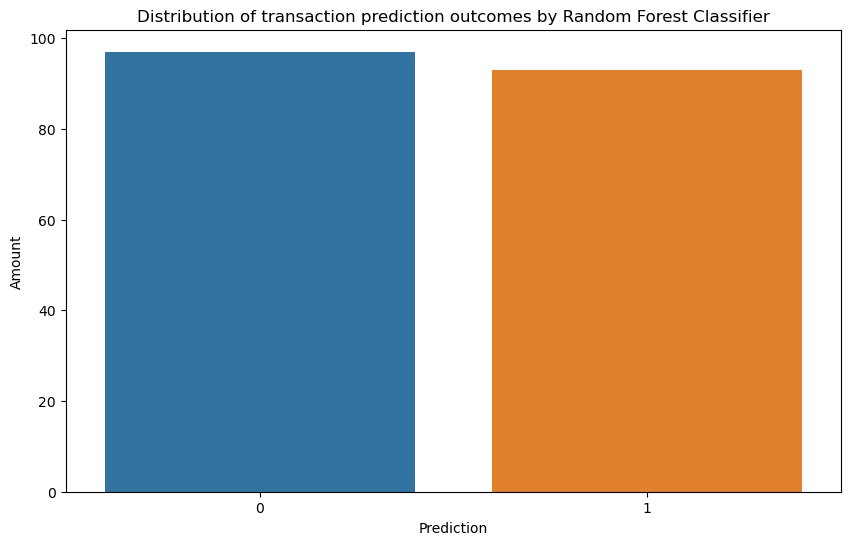

In [77]:
# Distribution of predictions made by Random Forest Classifier
plt.figure(figsize=(10, 6))
sns.countplot(data=predictions, x='Predicted')
plt.title('Distribution of transaction prediction outcomes by Random Forest Classifier')
plt.xlabel('Prediction')
plt.ylabel('Amount')
plt.show()

In [78]:
# Visualization of fraudulent and normal transactions
# Adding original columns for further analysis
test_data = X_test.copy()
test_data['Actual'] = y_test
test_data['Predicted'] = y_pred2

# Display some fraudulent and normal transactions in more detail
fraudulent_detailed = test_data[test_data['Predicted'] == 1]
normal_detailed = test_data[test_data['Predicted'] == 0]

In [79]:
print("Detailed fraudulent transactions:")
print(fraudulent_detailed.head())

Detailed fraudulent transactions:
            V1        V2         V3         V4        V5        V6         V7  \
820   1.889618  1.073099  -1.678018   4.173268  1.015516 -0.009389  -0.079706   
523 -15.271362  8.326581 -22.338591  11.885313 -8.721334 -2.324307 -16.196419   
941  -1.927883  1.125653  -4.518331   1.749293 -1.566487 -2.010494  -0.882850   
796  -1.456876  3.740306  -7.404518   7.440964 -1.549878 -1.661697  -5.757213   
477   1.234235  3.019740  -4.304597   4.732795  3.624201 -1.357746   1.713445   

           V8        V9        V10       V11        V12       V13        V14  \
820  0.064071 -0.714517   0.042228 -0.408403  -0.929370  0.058686  -3.512845   
523  0.512882 -6.333685 -13.175198  9.939820 -14.225456  0.716034 -14.004776   
941  0.697211 -2.064945  -5.587794  2.115795  -5.417424 -1.235123  -6.665177   
796  1.615011 -2.194881  -6.807135  6.825793 -10.399749  1.836449 -11.872845   
477 -0.496358 -1.282858  -2.447469  2.101344  -4.609628  1.464378  -6.079337   

In [80]:
print("Detailed normal transactions:")
print(normal_detailed.head())

Detailed normal transactions:
           V1        V2        V3        V4        V5        V6        V7  \
327 -0.498212  1.194626  0.489327 -0.510890  0.905514  0.299801  0.545648   
30  -1.284036  1.611890  2.333462  3.886285 -0.415366  2.462808 -0.368639   
404 -0.638528  0.064402  1.245813 -0.983015  2.673065 -2.509824 -2.065747   
76  -0.601800  1.165868  1.243310 -0.198602  0.082964 -0.649808  0.635009   
59  -1.003190 -0.940193  2.313455 -0.544606 -2.253453  1.941685  1.696626   

           V8        V9       V10       V11       V12       V13       V14  \
327  0.194292 -0.346495 -0.028883 -0.031577  0.062643  0.359219 -0.411208   
30   0.742133 -0.814311  2.436457 -0.155127 -0.854153 -0.495418 -0.346186   
404 -0.905805  0.304228 -0.542724 -0.942403  0.254419 -0.971853  0.569702   
76   0.010037 -0.081902  0.015883 -0.921475 -0.512914 -0.462933  0.157587   
59  -0.689180 -0.518230  0.784091  1.480073 -0.134205  0.237198 -1.537309   

          V15       V16       V17       V18 

## Comparison of model results

In [81]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

final_data

,Models,ACC
0,LR,95.263158
1,DT,91.052632
2,RF,95.263158


<Axes: xlabel='Models', ylabel='ACC'>

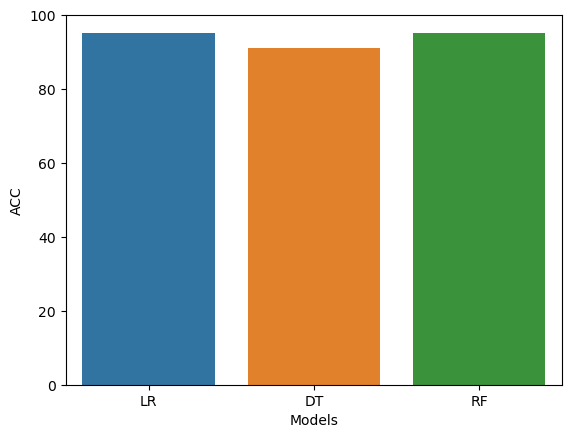

In [82]:
sns.barplot(x='Models', y='ACC', data=final_data)